# Combined Graphs

## Read Data

### Read results for > 7 day LOS prediction

In [1]:
import os
import pandas as pd


sevenDayPredsDf = pd.read_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '/data/experiments/05_predict_length_of_stay/results/preds_los_gt_seven_days.csv')
sevenDayPredsDf

,person_id,visit_occurrence_id,preds
0,2473,237159,0.016262
1,2839,163173,0.374234
2,3071,3103539,0.783926
3,3111,3160037,0.063170
4,3570,3342265,0.000431
...,...,...,...
2211,27213578,2769226,0.010543
2212,27214288,2825787,0.005323
2213,27214462,2841565,0.089587
2214,27214485,2709648,0.532503


### Read results for > 14 day LOS prediction

In [2]:
import os
import pandas as pd


fourteenDayPredsDf = pd.read_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '/data/experiments/05_predict_length_of_stay/results/preds_los_gt_fourteen_days.csv')
fourteenDayPredsDf

,person_id,visit_occurrence_id,preds
0,2473,237159,0.002069
1,2839,163173,0.041890
2,3071,3103539,0.000262
3,3111,3160037,0.014036
4,3570,3342265,0.002655
...,...,...,...
2218,27213578,2769226,0.000054
2219,27214288,2825787,0.000613
2220,27214462,2841565,0.001859
2221,27214485,2709648,0.045094


### Read Datamatrix

In [3]:
import os
import pandas as pd


datamatrixTestDf = pd.read_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/experiments/05_predict_length_of_stay/datamatrix/data_matrix_test.csv''')
datamatrixTestDf

,person_id,visit_occurrence_id,measurement_date,visit_start_date_adm,death_adm,vitals_systemic_mean_avg,vitals_systemic_diastolic_avg,vitals_systemic_systolic_avg,vitals_respiration_avg,vitals_heartrate_avg,...,labs_MCH - Mean corpuscular haemoglobin_last,labs_White blood cell count_last,labs_Red blood cell distribution width_last,labs_Glucose level_last,labs_Bicarbonate level_last,labs_Anion gap_last,patientunitstayid,unitdischargeoffset,los_gt_seven_days,los_gt_fourteen_days
0,248364,141515,2014-04-04,2014-04-04,0,65.344086,47.924731,105.265233,25.763066,89.777003,...,31.6,3.8,15.5,97.0,21.0,19.0,141515,8882,False,False
1,248364,141515,2014-04-05,2014-04-04,0,68.147368,51.291228,99.049123,23.763889,101.937500,...,31.6,10.0,16.7,154.0,21.0,14.0,141515,8882,False,False
2,248364,141515,2014-04-06,2014-04-04,0,78.180556,57.565972,111.343750,23.731707,109.117021,...,30.8,12.9,17.3,105.0,22.0,13.0,141515,8882,False,False
3,248364,141515,2014-04-07,2014-04-04,0,82.724739,57.696864,123.606272,33.772727,79.000000,...,30.9,11.7,17.0,123.0,22.0,12.0,141515,8882,False,False
4,248364,141515,2014-04-08,2014-04-04,0,75.000000,53.103306,114.359504,30.335664,81.479021,...,31.5,9.9,17.2,116.0,22.0,14.0,141515,8882,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11174,351704,3352358,2014-04-21,2014-04-21,0,95.491379,72.723964,139.154272,16.623239,74.679577,...,26.0,18.2,19.5,110.0,21.0,8.0,3352358,2494,False,False
11175,351704,3352358,2014-04-22,2014-04-21,0,84.551994,61.618583,127.983796,19.358852,76.607656,...,26.0,20.5,19.4,167.0,21.0,10.0,3352358,2494,False,False
11176,3521842,3352884,2014-01-28,2014-01-28,0,68.407844,48.973854,113.097688,20.838346,96.206767,...,32.0,14.9,13.3,117.0,21.0,8.0,3352884,3390,False,False
11177,3521842,3352884,2014-01-29,2014-01-28,0,89.946929,66.934130,137.592436,19.909722,100.312500,...,32.0,14.4,13.7,62.0,19.0,6.0,3352884,3390,False,False


### Merge all the files

In [4]:
resultsDf = datamatrixTestDf[['person_id', 'visit_occurrence_id', 'los_gt_seven_days', 'los_gt_fourteen_days']].drop_duplicates()\
    .merge(sevenDayPredsDf.add_suffix('_seven'), left_on=['person_id', 'visit_occurrence_id'], right_on=['person_id_seven', 'visit_occurrence_id_seven'])\
            .drop(columns=['person_id_seven', 'visit_occurrence_id_seven'])\
                .merge(fourteenDayPredsDf.add_suffix('_fourteen'), left_on=['person_id', 'visit_occurrence_id'], right_on=['person_id_fourteen', 'visit_occurrence_id_fourteen'])\
                    .drop(columns=['person_id_fourteen', 'visit_occurrence_id_fourteen'])
resultsDf

,person_id,visit_occurrence_id,los_gt_seven_days,los_gt_fourteen_days,preds_seven,preds_fourteen
0,248364,141515,False,False,0.210994,0.018883
1,238079,142483,True,True,0.416374,0.006839
2,22143,146788,False,False,0.007503,0.000267
3,252140,148182,True,True,0.152193,0.032759
4,210052,151900,False,False,0.156388,0.014030
...,...,...,...,...,...,...
2211,3511532,3348836,True,False,0.002086,0.002064
2212,3519950,3351084,False,False,0.000116,0.000591
2213,355785,3351708,True,False,0.000471,0.002002
2214,351704,3352358,False,False,0.005927,0.000362


In [5]:
resultsDf['los_gt_seven_days'] = [1 if val else 0 for val in resultsDf.los_gt_seven_days]
resultsDf['los_gt_fourteen_days'] = [1 if val else 0 for val in resultsDf.los_gt_fourteen_days]
resultsDf

,person_id,visit_occurrence_id,los_gt_seven_days,los_gt_fourteen_days,preds_seven,preds_fourteen
0,248364,141515,0,0,0.210994,0.018883
1,238079,142483,1,1,0.416374,0.006839
2,22143,146788,0,0,0.007503,0.000267
3,252140,148182,1,1,0.152193,0.032759
4,210052,151900,0,0,0.156388,0.014030
...,...,...,...,...,...,...
2211,3511532,3348836,1,0,0.002086,0.002064
2212,3519950,3351084,0,0,0.000116,0.000591
2213,355785,3351708,1,0,0.000471,0.002002
2214,351704,3352358,0,0,0.005927,0.000362


## Combined ROC curve

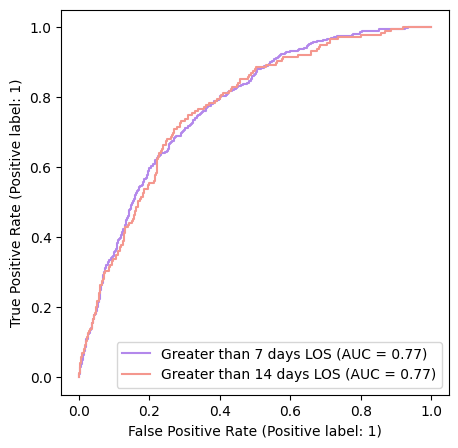

In [6]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from matplotlib import pyplot as plt


fig, ax = plt.subplots(figsize=(5, 5))

fpr, tpr, _  = roc_curve(resultsDf.los_gt_seven_days, resultsDf.preds_seven)
display = RocCurveDisplay.from_predictions(resultsDf.los_gt_seven_days, resultsDf.preds_seven, name='Greater than 7 days LOS', ax=ax, color='#b388eb')

fpr, tpr, _  = roc_curve(resultsDf.los_gt_fourteen_days, resultsDf.preds_fourteen)
display = RocCurveDisplay.from_predictions(resultsDf.los_gt_fourteen_days, resultsDf.preds_fourteen, name='Greater than 14 days LOS', ax=ax, color='#f4978e')
